In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00244/"
FERTILE_PATH = "datasets/fertile"
FERTILE_URL = DOWNLOAD_ROOT + "fertility_Diagnosis.txt"

In [3]:
def fetch_fertile_data(fertile_url=FERTILE_URL, fertile_path=FERTILE_PATH):
    if not os.path.isdir(fertile_path):
        os.makedirs(fertile_path)
    tgz_path = os.path.join(fertile_path, "fertility_Diagnosis.txt")
    urllib.request.urlretrieve(fertile_url, tgz_path)

In [4]:
fetch_fertile_data()

In [5]:
import pandas as pd

In [9]:
def load_fertile_data(fertile_path=FERTILE_PATH):
    csv_path = os.path.join(fertile_path, "fertility_Diagnosis.txt")
    df = pd.read_csv(csv_path, header=None) 
    return df

In [14]:
fertile = load_fertile_data()
fertile.columns = ['Season','Age','Disease','Trauma','Surgery','Fever','Alcohol','Smoking','Sitting','Status']

In [15]:
fertile.describe()
fertile.head(5)

,Season,Age,Disease,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Status
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


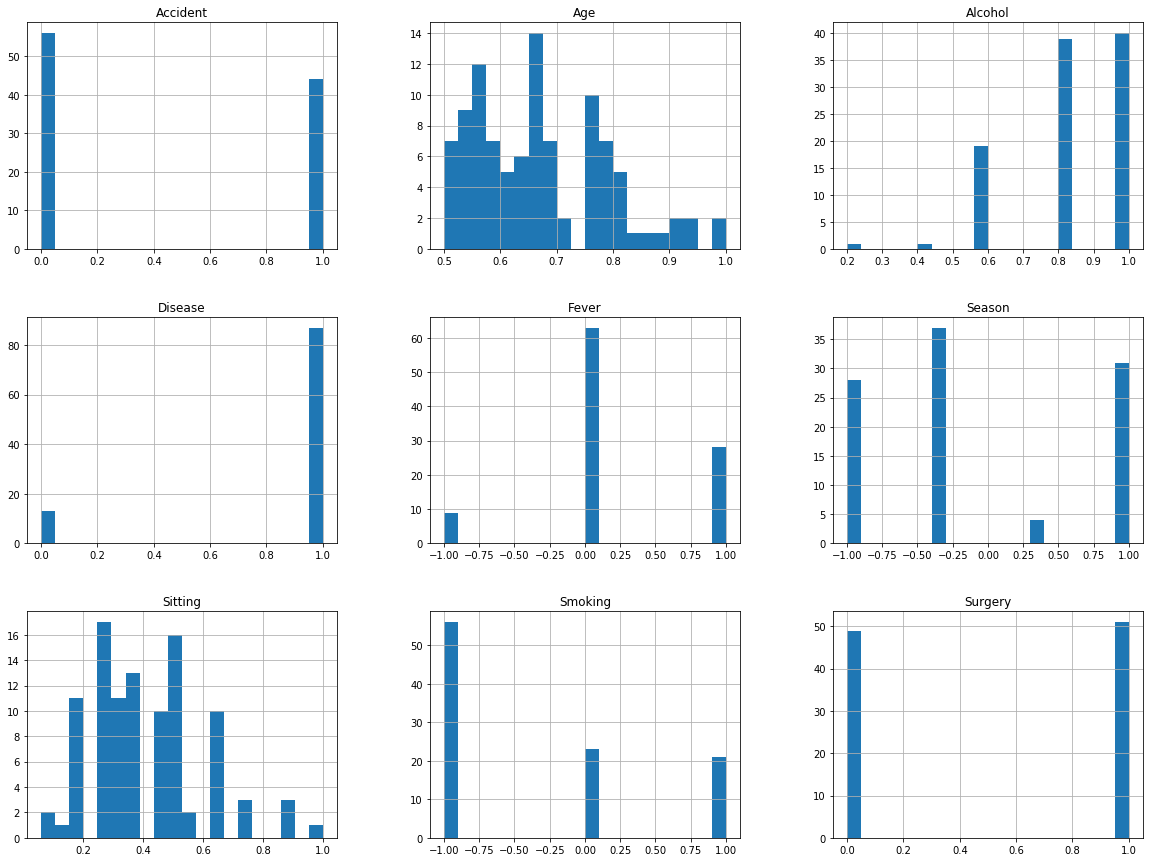

In [13]:
from matplotlib import pyplot as plt
fertile.hist(bins=20, figsize = (20,15))
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fertile_cat = fertile["Status"]
fertile_cat_encoded = encoder.fit_transform(fertile_cat.astype(str))
fertile ['Status_num'] = fertile_cat_encoded
fertile.head(5)

,Season,Age,Disease,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Status,Status_num
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O,1


In [28]:
fertile.dtypes
corr_matrix = fertile.corr()
corr_matrix['Status_num'].sort_values(ascending=False)

Status_num    1.000000
Season        0.192417
Age           0.115229
Surgery       0.054171
Smoking       0.045891
Sitting       0.022964
Disease      -0.040261
Fever        -0.121421
Trauma       -0.141346
Alcohol      -0.144760
Name: Status_num, dtype: float64

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111ecb128>,
      dtype=object)

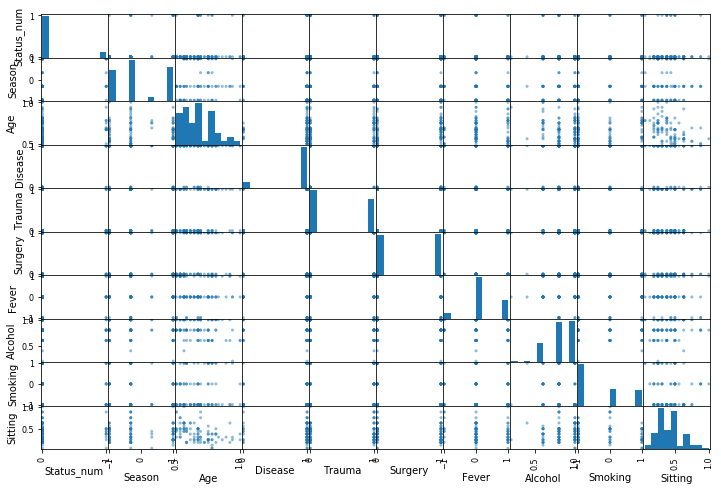

In [32]:
from pandas.tools.plotting import scatter_matrix
attributes = ['Status_num', 'Season','Age','Disease','Trauma','Surgery','Fever','Alcohol','Smoking','Sitting']
scatter_matrix(fertile[attributes], figsize=(12, 8))

In [45]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fertile, test_size = 0.25, random_state = 42)
print ("Train test shape is {0} and Test set shape is {1}".format(train_set.shape,test_set.shape))

Train test shape is (75, 10) and Test set shape is (25, 10)


In [46]:
X_train = train_set.drop(['Status_num'], axis=1)
y_train = train_set['Status_num']
X_test = test_set.drop(['Status_num'], axis=1)
y_test = test_set['Status_num']

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)
print(X_train_res.shape, y_train_res.shape)

In [29]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_res,y_train_res)
sgd_clf

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_res, y_train_res, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res, y_train_pred)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

array([[54, 12],
       [26, 40]])

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_train_pred = cross_val_predict(lr, X_train_res, y_train_res, cv=3)
confusion_matrix(y_train_res, y_train_pred)

array([[43, 23],
       [18, 48]])

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train_res, y_train_res)
rfc_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_train_pred = cross_val_predict(rfc_clf, X_train_res, y_train_res, cv=3)
confusion_matrix(y_train_res, y_train_pred)

array([[63,  3],
       [ 7, 59]])

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_res, y_train_res)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_train_pred = cross_val_predict(dt_clf, X_train_res, y_train_res, cv=3)
confusion_matrix(y_train_res, y_train_pred)

array([[60,  6],
       [ 5, 61]])

In [45]:
y_test_pred = lr.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[15,  2],
       [ 7,  1]])

In [46]:
y_test_pred = rfc_clf.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[21,  2],
       [ 1,  1]])

In [47]:
y_test_pred = dt_clf.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[22,  2],
       [ 0,  1]])